In [34]:
from ragraph.io.esl import from_esl
graph = from_esl(["./esl"])

import raesl.plot
figure = raesl.plot.mdm(
    graph,
    node_kinds=["component"],
)
figure.show()

ERROR ESL typechecker [E203] at esl/level_0/world.esl:248:9-248:9
  Unknown variable, parameter, or variable group instance named 'power-dissipated'.
ERROR ESL typechecker [E203] at esl/level_0/world.esl:252:9-252:9
  Unknown variable, parameter, or variable group instance named 'ambient-temperature'.


EslCompilationError: Could not compile the specification into a Graph object:
ERROR ESL typechecker [E203] at esl/level_0/world.esl:248:9-248:9
  Unknown variable, parameter, or variable group instance named 'power-dissipated'.
ERROR ESL typechecker [E203] at esl/level_0/world.esl:252:9-252:9
  Unknown variable, parameter, or variable group instance named 'ambient-temperature'.

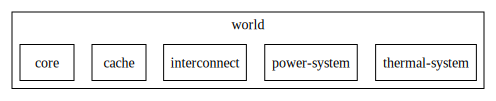

In [ ]:
digraph = raesl.plot.functional_dependency_diagram(
    graph,
    root=graph["world"],
    levels=2,
)
digraph

In [ ]:

from ragraph.plot.generic import Style as RaGraphStyle

style = raesl.plot.Style(
    ragraph=RaGraphStyle(
        piemap=dict(
            display="labels",
            mode="relative",
            highlight_row_annotation="row",
            highlight_row_color="rgba(255,0,0,0.5)",
        ),
    )
)

parents = {
    "world.core": "rgba(255,0,0,0.3)",
    "world.cache": "rgba(0,255,0,0.3)",
    "world.interconnect": "rgba(0,0,255,0.3)",
    "world.power": "rgba(255,255,0,0.3)",
    "world.thermal": "rgba(0,255,255,0.3)",
};

for node in graph.nodes:
    for parent, color in parents.items():
        if node.name.startswith(parent):
            break

    print(node.name)

    if node.name.startswith(parent):
        node.annotations.row = color

figure = raesl.plot.mdm(
    graph,
    # node_kinds=["component", "variable", "function_spec", "design_spec", "relation_spec"],
    # edge_kinds=["functional_dependency", "mapping_dependency"],
    depth=4,
    style=style,
)

figure.show()


real
integer
string
boolean
Temperature
Voltage
Frequency
Performance
DataRate
ProcessNode
Power
Area
Bandwidth
Length
BusWidth
Latency
Density
ThermalResistance
ThermalPower
CacheCapacity
HitRate
Count
Current
Mass
Energy
Massflowrate
HeatCapacity
TemperatureGradient
ThermalConductivity
Data
world
world.core-temperature
world.core-voltage
world.core-clock-frequency
world.core-computational-performance
world.core-data-processing-speed
world.core-required-data-bandwidth
world.core-process-node
world.core-power-consumption
world.core-die-area
world.core-transistors
world.cache-capacity
world.cache-die-area
world.cache-voltage
world.cache-bandwidth
world.cache-bus-width
world.cache-hit-rate
world.cache-power-consumption
world.cache-process-node
world.cache-latency
world.cache-transistors
world.cache-temperature
world.cache-clock-frequency
world.interconnect-length
world.interconnect-bandwidth
world.interconnect-bus-width
world.interconnect-latency
world.interconnect-frequency
world.power-

In [ ]:
from ragraph.analysis import heuristics

leafs = [node.name for node in graph.nodes if node.kind == "relation_spec" and node.is_leaf]

# Cluster components
heuristics.markov_gamma(
    graph=graph,
    alpha=1,     # Expension parameter.
    beta=4,    # Inflation parameter.
    mu=8,      # Evaporation parameter.
    gamma=8,   # Bus detection parameter.
    leafs = [node.name for node in graph.nodes if node.kind == "variable" and node.is_leaf],
    inplace=True
)

# Reloaded MDM based on clustered graph.
figure = raesl.plot.mdm(
    graph,
    # node_kinds=["component", "variable", "function_spec", "design_spec"],
    # edge_kinds=["functional_dependency", "mapping_dependency"],
    depth=10,
)

figure

In [ ]:
from ragraph.analysis import sequence
from raesl.plot.view_funcs import multi_domain
import ragraph.plot

# Select correct nodes and edges to be displayed.
nodes, edges = multi_domain(
    graph,
    depth=4
)

leaf_comps = [n for n in nodes if n.kind == "component"]
leaf_funcs = [n for n in nodes if n.kind == "function_spec"]
leaf_design = [n for n in nodes if n.kind == "design_spec"]
leaf_models = [n for n in nodes if n.kind == "relation_spec"]
leaf_vars = [n for n in nodes if n.kind == "variable"]

# Sequence functions.
_, _, sequenced_functions = sequence.utils.branchsort(algo=sequence.scc_tearing, graph=graph, algo_args=dict(inf=1, dep=1, mu=3), inplace=True, nodes=leaf_models)

# Reload figure based on sequence.
figure = ragraph.plot.mdm(
    leafs = leaf_comps + leaf_vars + sequenced_functions,
    edges = edges,
    style= ragraph.plot.Style(
        piemap=dict(
            display="labels",
            mode="relative",
            fields=graph.edge_labels
        ),
    )
)

figure